# Milestone P2

[Milestone P2 briefing](https://epfl-ada.github.io/teaching/fall2023/cs401/projects/#p2-project-proposal-and-initial-analyses)

Goals: acquaint ourselves with the data, preprocess the data, complete all the necessary descriptive statistics tasks

Should contain (non-exhaustive):
- That you can handle the data in its size.
- That you understand what’s in the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have a reasonable plan and ideas for methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.
... initial analyses and data handling pipelines.

Grade: correctness, quality of code, and quality of textual descriptions
(20% of the project grade)

## Configuration

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [192]:
# Paths
DATA_PATH = '../data/'
MOVIES_FOLDER = DATA_PATH+'MovieSummaries/'

MOVIES_DATASET = MOVIES_FOLDER+"movie.metadata.tsv"
CHARACTERS_DATASET = MOVIES_FOLDER+"character.metadata.tsv"

In [193]:
# Load dataframes
movies_df = pd.read_csv(MOVIES_DATASET, sep='\t', names=['id_wiki','id_freebase','name','date',
                                                      'box_office','runtime','lang','countries','genres'])
characters_df = pd.read_csv(CHARACTERS_DATASET, sep='\t', names=['id_wiki','id_freebase','date',
                                                              'name_character','birth','gender',
                                                              'height','ethnicity','name_actor',
                                                              'age_actor','id_freebase_map',
                                                              'id_freebase_character','id_freebase_actor'])

### Data Description

In [194]:
print('DataFrame Movies size: {}'.format(movies_df.shape))
print('DataFrame Characters size: {}'.format(characters_df.shape))

DataFrame Movies size: (81741, 9)
DataFrame Characters size: (450669, 13)


In [195]:
movies_df.columns

Index(['id_wiki', 'id_freebase', 'name', 'date', 'box_office', 'runtime',
       'lang', 'countries', 'genres'],
      dtype='object')

In [196]:
characters_df.columns

Index(['id_wiki', 'id_freebase', 'date', 'name_character', 'birth', 'gender',
       'height', 'ethnicity', 'name_actor', 'age_actor', 'id_freebase_map',
       'id_freebase_character', 'id_freebase_actor'],
      dtype='object')

In [197]:
movies_df

,id_wiki,id_freebase,name,date,box_office,runtime,lang,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [198]:
characters_df

,id_wiki,id_freebase,date,name_character,birth,gender,height,ethnicity,name_actor,age_actor,id_freebase_map,id_freebase_character,id_freebase_actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


## What's in the data?
Description and visualization of the data:
- data type, formats (explain type for each feature)
- distributions
- missing values
- correlation
- ... ?

### Movies dataset

#### Preprocess features

In [250]:
def ccdf(x):
    '''This function calculates the Complementary Cumulative Distribution Function (CCDF)
    of the data 'x' and prepares it for plotting.

    Parameters:
        x (array-like): The dataset for which the CCDF is to be calculated.
    
    Returns:
        ccdf_y: decreasing index, by a constant step, of the same size as x
        ccdf_x: x sorted (increasing)

    Explanation:
    when many x elements have close values, the curve will have a drop
    (because ccdf_y constantly decrease, while ccdf_x stagnate at close values)
    and when x elements have very different values, the curve will stay flat
    (because for one step, ccdf_y has a small change, and ccdf_x has a wide change)'''
    # Calculate the CCDF values.
    # 'ccdf_y' represents a decreasing index, and 'ccdf_x' contains 'x' values sorted in increasing order.
    ccdf_y = 1. - (1 + np.arange(len(x))) / len(x)
    ccdf_x = x.sort_values()

    # Return the sorted 'x' values and CCDF values.
    return ccdf_x, ccdf_y

In [272]:
# Deep copy of the dataframe
movies = movies_df.copy()

# YEAR
movies['year'] = movies['date']
# Process dates like: yyyy-mm and yyyy-mm-dd
movies['year'] = movies['year'].str.replace(r'-\d{2}-\d{2}$', '', regex=True)
movies['year'] = movies['year'].str.replace(r'-\d{2}$', '', regex=True)
# Drop nan
movies_year = movies.dropna(subset=['year'])['year']
# Convert data type to int
movies_year = movies_year.astype(int)
# Drop outliers
movies_year = movies_year.drop(movies_year.index[movies_year<1800])

# BOX-OFFICE
movies_bo = movies.dropna(subset=['box_office'])['box_office']
movies_bo = movies_bo.astype(int)

# RUNTIME
movies_t = movies.dropna(subset=['runtime'])['runtime']
movies_t = movies_t.astype(int)


#### Plot

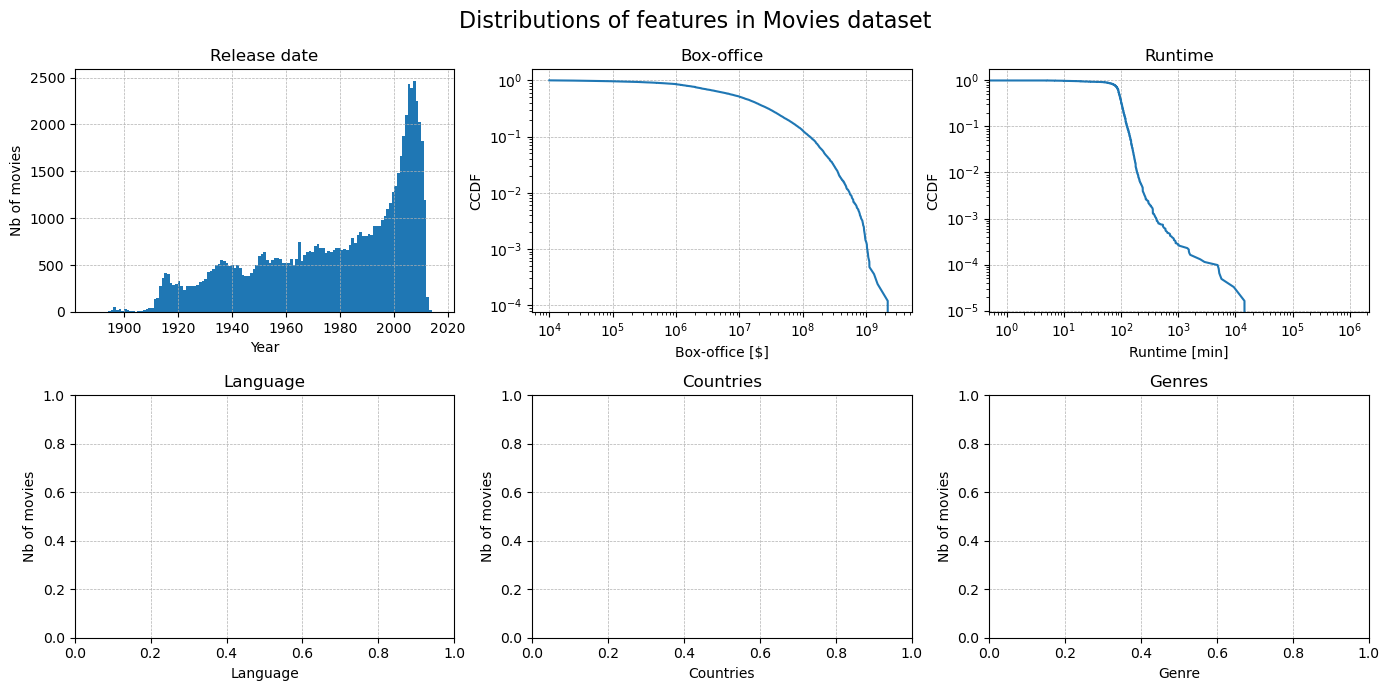

In [281]:
# Movies dataset features distributions
# For early visualization, we simply drop nan values

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14,7))
axs = axs.ravel()

# Movies release date distribution
movies_year.hist(bins=movies_year.nunique(), ax=axs[0])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Nb of movies')
axs[0].set_title('Release date')
axs[0].grid(linestyle='--', linewidth=0.5)

# Movies box-office distribution
ccdf_bo_x, ccdf_bo_y = ccdf(movies_bo)
axs[1].loglog(ccdf_bo_x, ccdf_bo_y)
axs[1].set_xlabel('Box-office [$]')
axs[1].set_ylabel('CCDF')
axs[1].set_title('Box-office')
axs[1].grid(linestyle='--', linewidth=0.5)

# Movies runtime distribution
ccdf_t_x, ccdf_t_y = ccdf(movies_t)
axs[2].loglog(ccdf_t_x, ccdf_t_y)
axs[2].set_xlabel('Runtime [min]')
axs[2].set_ylabel('CCDF')
axs[2].set_title('Runtime')
axs[2].grid(linestyle='--', linewidth=0.5)

# Movies language distribution
axs[3].set_xlabel('Language')
axs[3].set_ylabel('Nb of movies')
axs[3].set_title('Language')
axs[3].grid(linestyle='--', linewidth=0.5)

# Movies countries distribution
axs[4].set_xlabel('Countries')
axs[4].set_ylabel('Nb of movies')
axs[4].set_title('Countries')
axs[4].grid(linestyle='--', linewidth=0.5)

# Movies genres distribution
axs[5].set_xlabel('Genre')
axs[5].set_ylabel('Nb of movies')
axs[5].set_title('Genres')
axs[5].grid(linestyle='--', linewidth=0.5)


plt.suptitle("Distributions of features in Movies dataset", fontsize=16)
plt.tight_layout()
plt.show()

In [22]:
# Movies dataset other features

In [25]:
# Deeper analysis of feature we are interested in

### Characters dataset

In [ ]:
# Characters dataset features distributions

## Enrich Data
- filter
- transform data according to our needs

## Pipeline
Our ideas and structure to solve the problem. Reasonable plan, discuss alternatives, dropped ideas.

## Conclusion